In [1]:
import seaborn as sns

/var/folders/vv/89zs5c496pdd8ktzhzpzpd240000gn/T/ipykernel_3007/2478457668.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "SaleDate": pd.date_range(start="2022-01-01", periods=50, freq="M")



--- First 5 Rows ---
   Size  Rooms  Location   Price   SaleDate
0  1660      3     Rural  298286 2022-01-31
1  2094      3     Urban  349002 2022-02-28
2  1930      5     Rural  350396 2022-03-31
3  1895      3     Urban  264899 2022-04-30
4  2438      3  Suburban  424767 2022-05-31


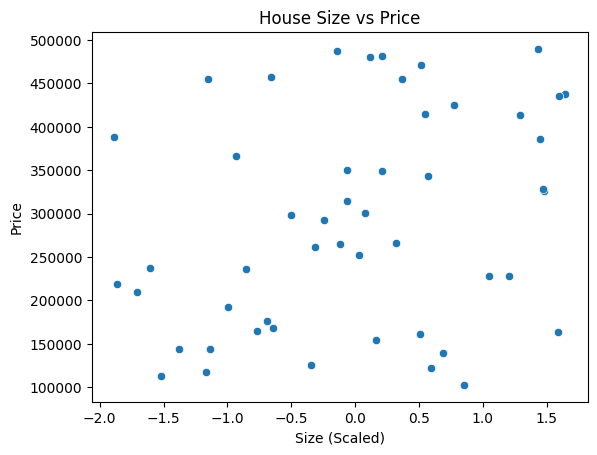

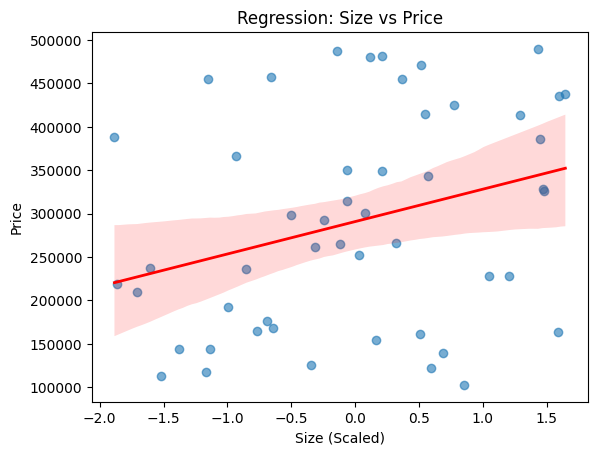

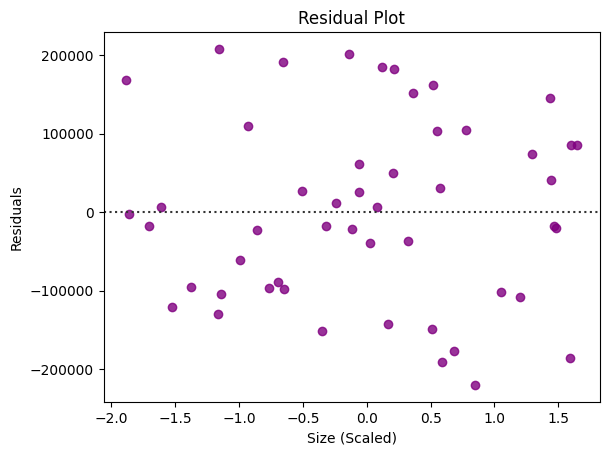


R-squared: -0.6515
Mean Squared Error: 22056347230.95

Predicted Prices: [295754.90248566 336132.67034582]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


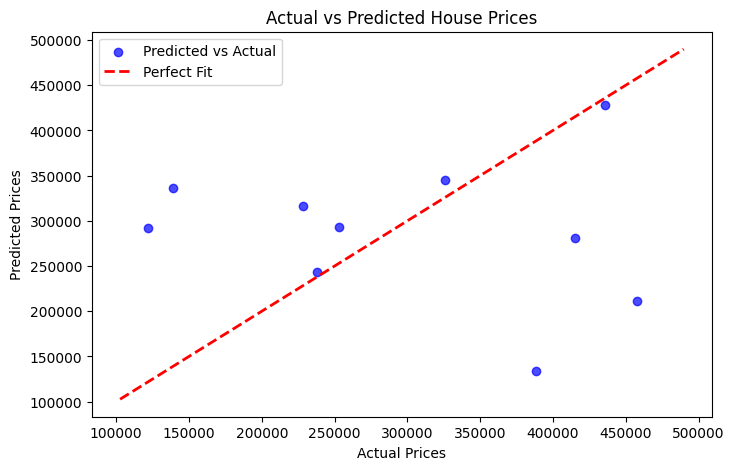

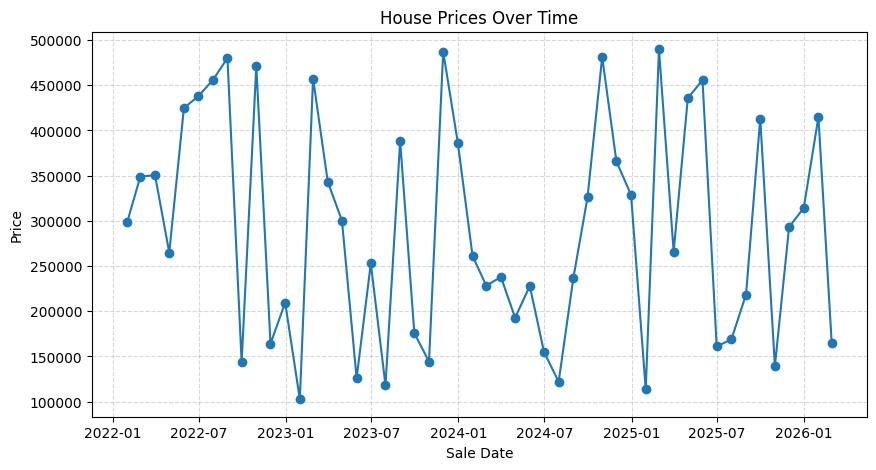

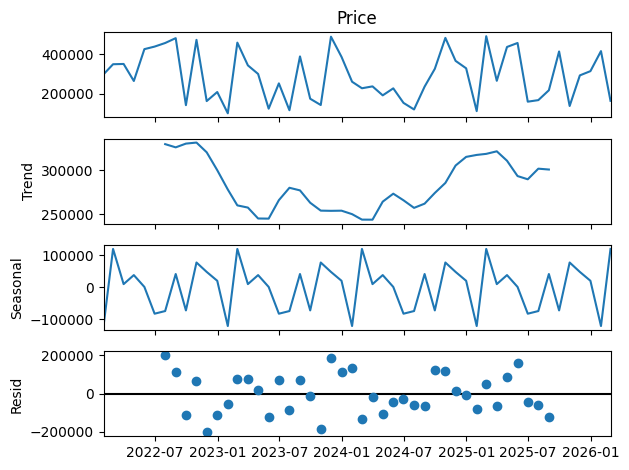

/var/folders/vv/89zs5c496pdd8ktzhzpzpd240000gn/T/ipykernel_3007/2478457668.py:110: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df["SaleDate"].max() + pd.offsets.MonthEnd(), periods=3, freq="M")



Forecast for Next Quarter:
         Date  ForecastedPrice
0 2026-03-31        162658.64
1 2026-04-30        159999.28
2 2026-05-31        157339.92


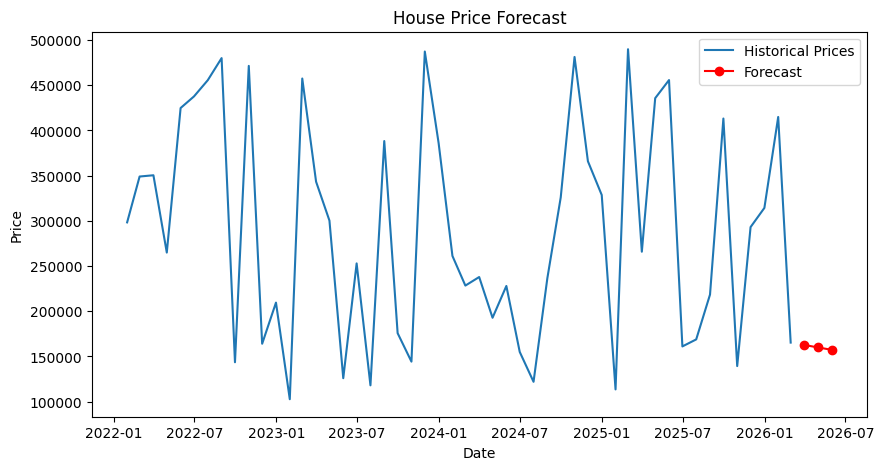

In [4]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Load & Inspect Dataset (Sample synthetic data)
np.random.seed(42)
data = {
    "Size": np.random.randint(800, 3000, 50),  # in sq ft
    "Rooms": np.random.randint(2, 6, 50),
    "Location": np.random.choice(["Urban", "Suburban", "Rural"], 50),
    "Price": np.random.randint(100000, 500000, 50),
    "SaleDate": pd.date_range(start="2022-01-01", periods=50, freq="M")
}
df = pd.DataFrame(data)
print("\n--- First 5 Rows ---")
print(df.head())

# 2. Data Preprocessing
# Fill missing values (if any)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Convert categorical Location to numerical using one-hot encoding
df = pd.get_dummies(df, columns=["Location"], drop_first=True)

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[["Size", "Rooms"]])
df[["Size", "Rooms"]] = scaled_features

# 3. Scatter Plot (Size vs Price)
sns.scatterplot(x=df["Size"], y=df["Price"])
plt.title("House Size vs Price")
plt.xlabel("Size (Scaled)")
plt.ylabel("Price")
plt.savefig("scatter_size_price.png", dpi=300)
plt.show()

# 4 & 5. Regression Plot (Customized)
sns.regplot(x="Size", y="Price", data=df, line_kws={"color": "red", "lw": 2}, scatter_kws={"alpha": 0.6})
plt.title("Regression: Size vs Price")
plt.xlabel("Size (Scaled)")
plt.ylabel("Price")
plt.savefig("regplot_size_price.png", dpi=300)
plt.show()

# 6. Residual Plot
sns.residplot(x="Size", y="Price", data=df, color="purple")
plt.title("Residual Plot")
plt.xlabel("Size (Scaled)")
plt.ylabel("Residuals")
plt.savefig("residual_plot.png", dpi=300)
plt.show()

# 7. Fit Regression Model
X = df.drop(columns=["Price", "SaleDate"])
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# 8. Evaluate Model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"\nR-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")

# 9. Predict House Prices (example)
example_sizes = np.array([[1500, 3, 1, 0], [2500, 4, 0, 1]])  # [Size, Rooms, Location_Suburban, Location_Urban]
example_sizes_scaled = example_sizes.copy()
example_sizes_scaled[:, 0:2] = scaler.transform(example_sizes[:, 0:2])
predicted_prices = model.predict(example_sizes_scaled)
print("\nPredicted Prices:", predicted_prices)

# 10. Visualize Predictions vs Actual
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue", label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.savefig("predicted_vs_actual.png", dpi=300)
plt.show()

# 11. Time Series Analysis
plt.figure(figsize=(10, 5))
plt.plot(df["SaleDate"], df["Price"], marker="o")
plt.title("House Prices Over Time")
plt.xlabel("Sale Date")
plt.ylabel("Price")
plt.grid(True, linestyle="--", alpha=0.5)
plt.savefig("price_time_series.png", dpi=300)
plt.show()

# 12. Seasonal Decomposition (Additive)
df_ts = df.set_index("SaleDate")
result = seasonal_decompose(df_ts["Price"], model="additive", period=12)
result.plot()
plt.savefig("seasonal_decomposition.png", dpi=300)
plt.show()

# 13. Forecast Future Prices (Next Quarter)
future_dates = pd.date_range(start=df["SaleDate"].max() + pd.offsets.MonthEnd(), periods=3, freq="M")
last_known_price = df["Price"].iloc[-1]
trend_slope = (df["Price"].iloc[-1] - df["Price"].iloc[0]) / len(df)
forecast_prices = [last_known_price + trend_slope * i for i in range(1, 4)]

forecast_df = pd.DataFrame({"Date": future_dates, "ForecastedPrice": forecast_prices})
print("\nForecast for Next Quarter:\n", forecast_df)

plt.figure(figsize=(10, 5))
plt.plot(df["SaleDate"], df["Price"], label="Historical Prices")
plt.plot(forecast_df["Date"], forecast_df["ForecastedPrice"], marker="o", color="red", label="Forecast")
plt.title("House Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.savefig("price_forecast.png", dpi=300)
plt.show()


In [3]:
!pip install matplotlib seaborn scikit-learn statsmodels pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 10.3 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 3.9 MB/s  0:00:02eta 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.5/36.5 MB 10.5 MB/s  0:00:03 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [statsmodels] [statsmodels]]
